# TorchVision Datasets

Before building any computer vision model, and after defining the problem you are trying to solve, you must answer one important question: **what data will you train it on?** In deep learning, the quality and structure of your dataset are fundamental to your model's performance.

Fortunately, **TorchVision** provides access to a rich collection of well-known, pre-formatted datasets, saving you the effort of writing data loading and preprocessing code from scratch. These datasets are designed to integrate seamlessly into a PyTorch training pipeline, giving you a reliable way to get high-quality data into your workflow.


In this lab, you'll get hands-on experience with the `torchvision.datasets` module. You will learn to:

* Load and inspect a standard built-in dataset like `CIFAR-10`, understanding its key initialization parameters.
* Load datasets that have unique loading requirements, such as `EMNIST`.
* Load your own images using the generic `ImageFolder` data loader.
* Generate placeholder data for testing and debugging using `FakeData`.

## Imports

In [1]:
import torch
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import helper_utils

In [2]:
# Set dataset directory
root_dir = './pytorch_datasets'

## Using Pre-built Datasets

TorchVision offers a variety of popular, ready-to-use datasets that can be downloaded and used with just a few lines of code, which are perfect for benchmarking models suited for different computer vision tasks. Understanding how to effectively load and process data is the foundational first step for any computer vision project.

**Available Datasets by Task**

Below is a breakdown of **some** of the most common datasets available, categorized by the problem they are designed to solve.

* **Image Classification**: Predict a single class label for an entire image.
    * **Datasets**: [MNIST](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST), [Fashion-MNIST](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST), [EMNIST](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.EMNIST.html#torchvision.datasets.EMNIST), [CIFAR-10](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10), [CIFAR-100](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.CIFAR100.html#torchvision.datasets.CIFAR100), [STL-10](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.STL10.html#torchvision.datasets.STL10), [LSUN](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.LSUN.html#torchvision.datasets.LSUN)
* **Object Detection & Segmentation**: Object detection involves drawing bounding boxes around objects, while segmentation involves classifying each pixel in the image. Many datasets provide annotations for both.
    * **Datasets**: Pascal VOC ([VOCDetection](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.VOCDetection.html#torchvision.datasets.VOCDetection)/[VOCSegmentation](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.VOCSegmentation.html#torchvision.datasets.VOCSegmentation)), COCO ([CocoDetection](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.CocoDetection.html#torchvision.datasets.CocoDetection)/[CocoCaptions](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.CocoCaptions.html#torchvision.datasets.CocoCaptions)), [Cityscapes](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.Cityscapes.html#torchvision.datasets.Cityscapes), [CelebA](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.CelebA.html#torchvision.datasets.CelebA)
* **Video Classification**: Classify actions or events occurring in video clips.
    * **Datasets**: [UCF-101](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.UCF101.html#torchvision.datasets.UCF101), [Kinetics](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.Kinetics.html#torchvision.datasets.Kinetics), [HMDB51](https://docs.pytorch.org/vision/0.21/generated/torchvision.datasets.HMDB51.html#torchvision.datasets.HMDB51)

Now that you have an idea of the breadth of datasets TorchVision provides, let's dive into the practical details of using them. While the specifics can vary, most datasets share a common set of principles for initialization and data handling. To get started, we'll walk through one of the most frequently used benchmarks in computer vision: `CIFAR10`.

### Standard Dataset Example: CIFAR10

Throughout your work with PyTorch, you've been initializing PyTorch built-in datasets from `torchvision` using code that looks like this:

```Python
cifar_dataset = datasets.CIFAR10(root=root_dir, 
                                 train=True, 
                                 download=True,
                                )
```

You pass in a few parameters, and everything just works.

But what exactly is each of these initial parameters, or "flags" doing? Understanding them is the first step to mastering how you handle data in PyTorch. Let's break down this common example.

* `root`: A string specifying the directory path where the dataset will be stored. If the data already exists at this path, PyTorch will use it.

* `train`: A boolean that selects the data split. For `CIFAR-10`, `True` loads the 50,000 training images, while `False` loads the 10,000 test images.

* `download`: A boolean that, if `True`, downloads the dataset from the internet if it's not found in your `root` directory. If `False`, an error will occur, **but only if the dataset isn't already present** at the `root` path.

Let's see this in action.

* Run the code cell below to initialize the [CIFAR10](https://docs.pytorch.org/vision/0.9/datasets.html#torchvision.datasets.CIFAR10) dataset.
* You'll use the train split by setting `train=True` and allow the data to be downloaded by setting `download=True`.

In [3]:
# Initialize the CIFAR-10 training dataset
cifar_dataset = datasets.CIFAR10(
    root=root_dir,      # Path to the directory where the data is/will be stored
    train=True,         # Specify that you want the training split of the dataset
    download=True       # Download the data if it's not found in the root directory
)

For a simple download using the flags you set, each item in the dataset is a tuple containing two things:

* An **image** in the PIL format.
* An **integer** representing the label for that image.

In [4]:
# Get the first sample (at index 0), which is a (image, label) tuple
image, label = cifar_dataset[0]

print(f"Image Type:        {type(image)}")
# Since `image` a PIL Image object, its dimensions are accessed using the .size attribute.
print(f"Image Dimensions:  {image.size}")
print(f"Label Type:        {type(label)}")

Image Type:        <class 'PIL.Image.Image'>
Image Dimensions:  (32, 32)
Label Type:        <class 'int'>


#### Preparing the Data with Transformations

As you're already familiar, PyTorch models require input data to be **tensors**, not the PIL Images. You also need transformations to normalize the data and augment it, which helps in training a robust model.

After you've downloaded a dataset and perhaps done some initial analysis on it, you can prepare it for your model. You do this by assigning a transformation pipeline directly to the dataset's `.transform` attribute. This modifies the dataset in-place, so from that point on, any time you access an item, the transformation will be applied automatically.

In [5]:
# Define a transformations pipeline
cifar_transformation = transforms.Compose([
    transforms.ToTensor(),
    # The mean and std values are standard for the CIFAR-10 dataset
    transforms.Normalize(mean=(0.4914, 0.4822, 0.4465),
                         std=(0.2023, 0.1994, 0.2010)
                        )
])

# Assign the entire transformation pipeline to the dataset's .transform attribute
cifar_dataset.transform = cifar_transformation

* Notice how the transformation is applied automatically.
    * The `image` is now a properly shaped PyTorch tensor, but the `label` is still an integer, as the transformation pipeline only targeted the `image`.

In [6]:
# Access the first item again
image, label = cifar_dataset[0]

print(f"Image Type:                   {type(image)}")
# Since the `image` is now a PyTorch Tensor, its dimensions are accessed using the .shape attribute.
print(f"Image Shape After Transform:  {image.shape}")
print(f"Label Type:                   {type(label)}")

Image Type:                   <class 'torch.Tensor'>
Image Shape After Transform:  torch.Size([3, 32, 32])
Label Type:                   <class 'int'>


* Use a `DataLoader` to grab a small batch of your transformed images and display them in a grid.

In [7]:
# Define the datalaoder
cifar_dataloader = data.DataLoader(cifar_dataset, batch_size=8, shuffle=True)

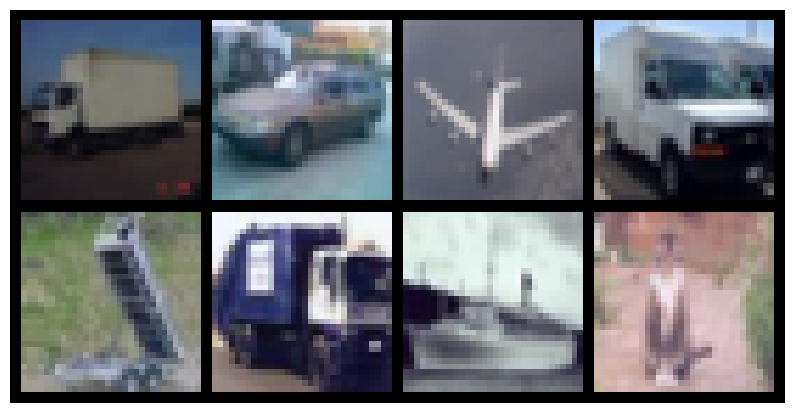

In [8]:
helper_utils.display_images(cifar_dataloader)

#### The Direct Approach: Using the 'transform' Parameter

The method you just saw, assigning to `.transform` after loading, is powerful and flexible, especially when you're exploring a new dataset.

However, in most real-world projects, you already know which transformations you need right from the start. For this, there's a more direct and common approach. You can pass your transformation pipeline directly into the dataset's initializer using the `transform` parameter.

```Python
cifar_dataset = datasets.CIFAR10(...
                                 transform=cifar_transformation
                                )
```

This tells the dataset to apply these transformations from the moment it's created, all in one clean step.

* Run the code cell below to initialize the `CIFAR10` dataset.
* You'll use the test split data this time by setting `train=False`, and apply the transformation pipeline directly using the `transform` parameter.

In [9]:
cifar_dataset = datasets.CIFAR10(root=root_dir, 
                                 train=False, 
                                 download=True,
                                 transform=cifar_transformation
                                )

* Use a `DataLoader` to grab a small batch of your newly loaded test images and display them in a grid.

**Note**: Setting `shuffle=True` so that a random batch of images is displayed each time.

In [10]:
cifar_dataloader = data.DataLoader(cifar_dataset, batch_size=8, shuffle=True)

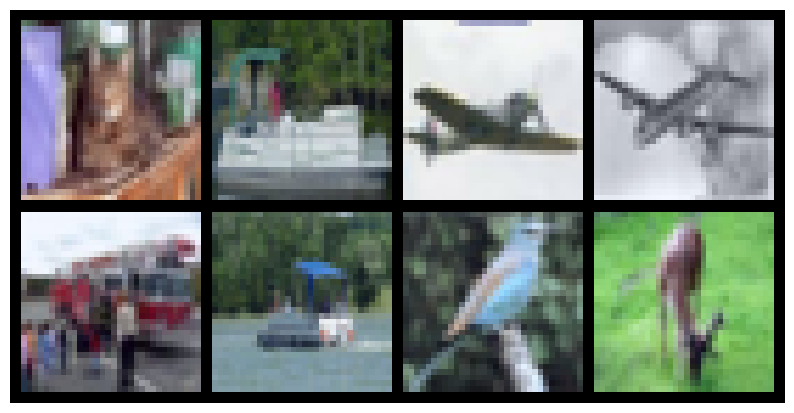

In [11]:
helper_utils.display_images(cifar_dataloader)

<br>

The entire process you just saw used the `CIFAR10` dataset. While the methods for loading data and applying transformations are more or less the same across `torchvision`, it's important to remember that **each dataset is unique**.

Some datasets might have different parameters, while others might have fewer (for example, some datasets don't have a pre-defined `train`/`test` split). It's always a good habit to explore [torchvision datasets](https://docs.pytorch.org/vision/0.9/datasets.html) and read their official documentation to fully understand how to use each one correctly.

With that in mind, let’s look at another dataset, `EMNIST`.

### Dataset with Special Parameters Example: EMNIST

While many datasets share similar initialization parameters, some have unique requirements. The EMNIST dataset is one such example. Let's take a look.

* First, define the transformation pipeline for the `EMNIST` dataset.
    * Since raw images in this dataset are not oriented correctly for easy visualization, you'll **rotate** and **vertically flip** them.
    * For normalization, you'll use `transforms.Normalize((0.5,), (0.5,))`. This will be explained in a bit.

In [12]:
# Define the transformation pipeline
emnist_transformation = transforms.Compose([
    # 90-degree rotation, it randomly rotates between +90 degrees and +90 degrees
    transforms.RandomRotation(degrees=(90, 90)),
    # p=1.0 guarantees vertical flip
    transforms.RandomVerticalFlip(p=1.0),
    transforms.ToTensor(),
    # Normalizes the tensor, rescaling pixels from [0, 1] to [-1, 1]
    transforms.Normalize((0.5,), (0.5,)) # The mean and std must be in a tuple
])

Unlike CIFAR-10, the `EMNIST` dataset class requires an additional parameter: `split`. This is because the EMNIST dataset is actually **a collection of six different datasets**, and you must specify which one you want to load.

```python
emnist_digits_dataset = datasets.EMNIST(root=root_dir,
                                        split= ...,  # Need to specify a `split`
                                        train=True,
                                        download=True,
                                        transform=emnist_transformation
                                       )
```

The available splits are: `byclass`, `bymerge`, `balanced`, `letters`, `digits`, and `mnist`.

Because each split contains different data, there is no single, standard way to normalize the entire EMNIST collection.

For the `digits` split that you'll be using, `transforms.Normalize((0.5,), (0.5,))` is a standard and effective choice. The values must be in a tuple because the function expects a sequence of means and standard deviations for each image channel.

* Run the code cell below to initialize the [EMNIST](https://docs.pytorch.org/vision/0.9/datasets.html#torchvision.datasets.EMNIST) dataset.
* You'll specify the `digits` split to load only the handwritten digit images.

In [13]:
emnist_digits_dataset = datasets.EMNIST(root=root_dir,
                                        split='digits',  # Specify the 'digits' split
                                        train=False,
                                        download=True,
                                        transform=emnist_transformation
                                       )

* Use a `DataLoader` to grab a small batch of your loaded `EMNIST` images and display them in a grid.

In [14]:
emnist_digits_dataloader = data.DataLoader(emnist_digits_dataset, batch_size=8, shuffle=True)

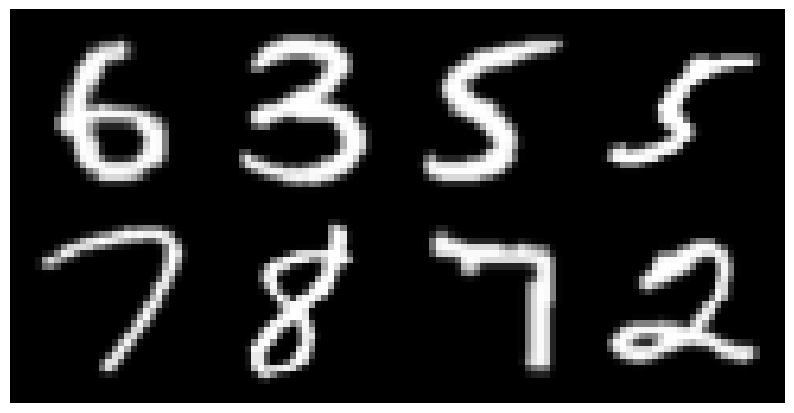

In [15]:
helper_utils.display_images(emnist_digits_dataloader)

## Custom and Specialized Datasets

Beyond pre-defined datasets, TorchVision provides powerful tools for working with your own images and generating test data.

### Loading Custom Images: ImageFolder

`ImageFolder` is a generic dataset loader that lets you use your own images without writing a custom `Dataset` class. It's incredibly useful, but it requires you to organize your images into a specific folder structure.

The main requirement for `ImageFolder` is that your root directory must contain one sub-directory for each class. `ImageFolder` automatically uses the name of each sub-directory as the class label.

For this example, you'll be using the following directory structure:

```
./tiny_fruit_and_vegetable/
├── Apple__Healthy/
│   ├── FreshApple (2).jpg
│   └── ...
├── Guava__Healthy/
│   ├── FreshGuava (179).jpg
│   └── ...
├── Mango__Healthy/
│   ├── 22.jpg
│   └── ...
├── Pomegranate__Healthy/
│   ├── FreshPomegranate (3).jpg
│   └── ...
└── Strawberry__Healthy/
    ├── 48.jpg
    └── ...
```

When you point `ImageFolder` to the `./tiny_fruit_and_vegetable` directory, it will:

* Automatically find **five classes** based on the sub-directory names: `Apple__Healthy`, `Guava__Healthy`, `Mango__Healthy`, `Pomegranate__Healthy`, and `Strawberry__Healthy`.
* Assign an integer label to each class (e.g., `Apple__Healthy` --> `0`, `Guava__Healthy` --> `1`, and so on).
* Assume that all images inside the `Apple__Healthy/` folder belong to class `0`, all images in `Guava__Healthy/` belong to class `1`, etc.

**NOTE:** you can explore the folder on the left sidebar.

* Define the path for the `tiny_fruit_and_vegetable` directory of the dataset. `ImageFolder` will use this path to find the images.

In [16]:
root_dir = './tiny_fruit_and_vegetable'

Just like the built-in datasets, `ImageFolder` allows you to pass a transformation pipeline to be applied to your images as they are loaded. For any deep learning task, this pipeline must **at least convert the images to tensors**. Furthermore, to enable batch processing with a `DataLoader`, it's also essential to **resize the images to a uniform size**.

For this example, you'll also normalize the images. While it's best practice to use the *actual* mean and standard deviation of your specific dataset for optimal performance, using `0.5` for both is a common and effective starting point that scales your pixel values to the `[-1, 1]` range.

In [17]:
# Define a transformation pipeline
image_transformation = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize( 
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

* Run the code cell below to initialize the [ImageFolder](https://docs.pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html) dataset.
* You'll pass in arguments:
    * `root`: The path to the root directory that contains your class subfolders.
    * `transform`: An **optional** argument for the transformation pipeline to be applied. While you can pass `None`, for this case, you will use the pipeline you defined earlier.

In [18]:
fruit_dataset = datasets.ImageFolder(root=root_dir,
                                     transform=image_transformation
                                    )

> #### Side Note:
>
> As you've seen, each dataset is unique. You might have noticed that unlike `CIFAR10` or `EMNIST`, you  didn't pass a `train=True` or `train=False` argument here. That's because `ImageFolder` works with your own custom directory of images, which doesn't have a predefined split.
>
> So, how do you create training and validation/testing sets when using `ImageFolder`? While there are several ways to approach this, two strategies are particularly common.
>
> **Strategy 1: Split the Dataset Object**
>
> The first strategy is to load the entire dataset from your root folder into a single `ImageFolder` object. You would then use a PyTorch function, like `torch.utils.data.random_split`, to programmatically divide that single dataset object into smaller training and testing datasets. This approach is very convenient if you plan to apply the exact same transformations to both splits.
>
> **Strategy 2: Pre-split the Directories**
>
> The second common strategy is to organize your file system into `train` and `test` subdirectories before you even run your code. Each of these directories would contain the class subfolders inside them. You would then create two separate `ImageFolder` datasets, one pointing to the "train" directory and the other to the "test" directory. This method is ideal when you need to apply different transformation pipelines to your training and testing data, such as including data augmentation only for the training set.

* Use a `DataLoader` to grab a small batch of your loaded `ImageFolder` images and display them in a grid.

In [19]:
fruit_dataloader = data.DataLoader(fruit_dataset, batch_size=8, shuffle=True)

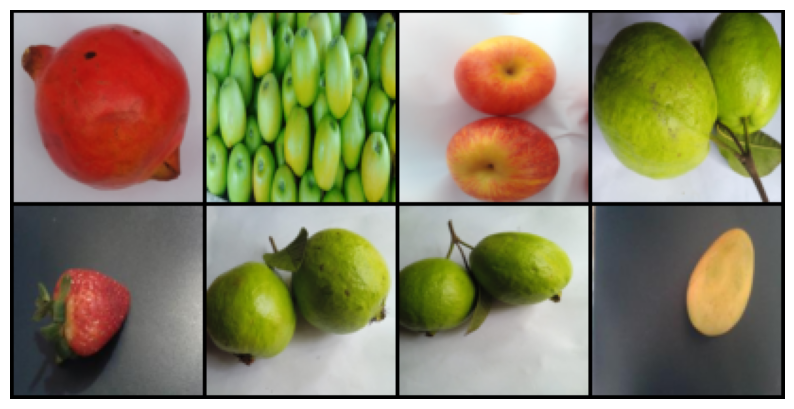

In [20]:
helper_utils.display_images(fruit_dataloader)

### Generating Synthetic Data: FakeData

`FakeData` is a handy `torchvision` dataset that generates random images and labels on the fly. It's perfect for quickly testing a training loop, a data loading pipeline, or a model architecture without waiting for a real dataset to download. You can specify key properties like the number of images, their dimensions, and the number of classes.

It doesn't fall under "custom datasets" in the traditional sense, as you aren't providing the data, but it's a specialized tool for development and debugging.

* Run the code cell below to initialize the [FakeData](https://docs.pytorch.org/vision/main/generated/torchvision.datasets.FakeData.html#torchvision.datasets.FakeData) dataset.
* You'll pass in arguments:
    * `size`: The total number of fake samples you want in the dataset.
    * `image_size`: A tuple defining the dimensions of the generated images in the format `(Channels, Height, Width)`.
    * `num_classes`: The number of possible classes for the labels.
    * `transform`: An **optional** transformation pipeline to apply to the images as they are generated.

In [21]:
# Define a transformation pipeline
fake_data_transform = transforms.Compose([
    transforms.ToTensor()
])

# Initialize the FakeData dataset
fake_dataset = datasets.FakeData(
    size=1000,                    # Total number of fake images
    image_size=(3, 32, 32),       # (Channels, Height, Width)
    num_classes=10,               # Number of possible classes
    transform=fake_data_transform # Apply the transformation
)

* Use a `DataLoader` to grab a small batch of your generated `FakeData` images and display them in a grid.

In [22]:
fake_dataloader = data.DataLoader(fake_dataset, batch_size=8, shuffle=True)

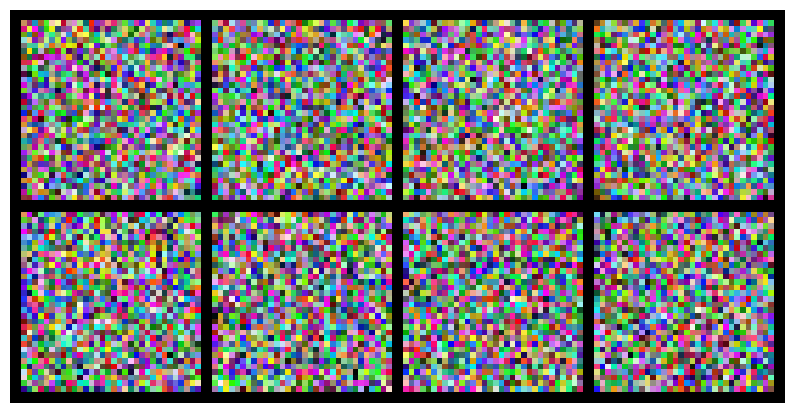

In [23]:
helper_utils.display_images(fake_dataloader)

## Try Yourself: Practice Loading Datasets

Now it's your turn to apply what you've learned. The following exercises will challenge you to load different datasets, making sure to use the correct transformations for each one.

### Exercise 1: FashionMNIST

* Define a simple transformation pipeline.

In [24]:
# Define a transformation pipeline
grayscale_transformation = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    # Use a mean and std for a single channel
    transforms.Normalize(mean=(0.5,), std=(0.5,)) 
])

* Re-define the root directory back as `'./pytorch_datasets'`

In [25]:
# Set dataset directory
root_dir = './pytorch_datasets'

* Write the code below to initialize the [FashionMNIST](https://docs.pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) **`Train`** dataset.
* For `transform`, use the `grayscale_transformation` pipeline you defined above.

In [27]:
try:
    fashion_mnist_dataset = datasets.FashionMNIST(root=root_dir, 
                                              train=True, 
                                              download=True,
                                              transform=grayscale_transformation
                                             ) ### Add your code here
    
    print("\033[92mDataset loaded successfully!")
    
except:
    print("\033[91mSomething went wrong, try again!")

Dataset loaded successfully!


<br>
<details>
<summary><span style="color:green;"><strong>Solution (Click here to expand)</strong></span></summary>

```python
fashion_mnist_dataset = datasets.FashionMNIST(root=root_dir, 
                                              train=True, 
                                              download=True,
                                              transform=grayscale_transformation
                                             )
```

* To confirm that everything has loaded correctly, visualize a small batch of the images.

In [28]:
fashion_mnist_dataloader = data.DataLoader(fashion_mnist_dataset, batch_size=8, shuffle=True)

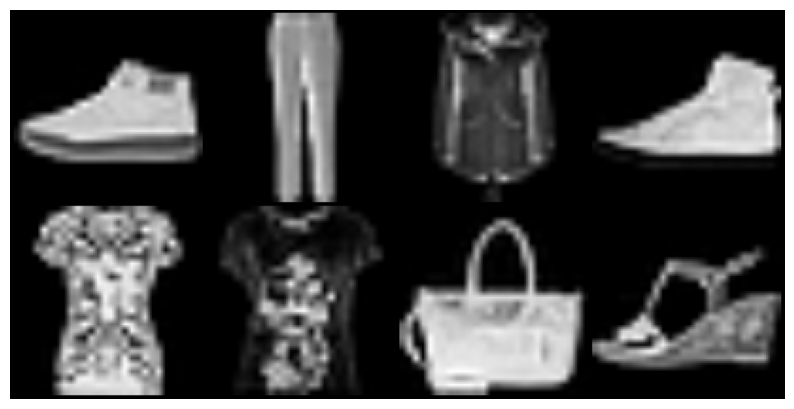

In [29]:
helper_utils.display_images(fashion_mnist_dataloader)

### Exercise 2: SVHN

* Define a transformation pipeline.

In [30]:
# Define a 3-channel transformation
svhn_transformation = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

* Write the code below to initialize the [SVHN](https://docs.pytorch.org/vision/main/generated/torchvision.datasets.SVHN.html) (Street View House Numbers) dataset.
* Set the following arguments as:
    * From `split`, get `'test'`.
    * Use `svhn_transformation` for `transform`.

In [32]:
try:
    svhn_dataset  = datasets.SVHN(root=root_dir,
                             split='test',
                             download=True,
                             transform=svhn_transformation
                            )### Add your code here
    
    print("\033[92mDataset loaded successfully!")
    
except:
    print("\033[91mSomething went wrong, try again!")

Dataset loaded successfully!


<br>
<details>
<summary><span style="color:green;"><strong>Solution (Click here to expand)</strong></span></summary>

```python
svhn_dataset = datasets.SVHN(root=root_dir,
                             split='test',
                             download=True,
                             transform=svhn_transformation
                            )
```

* To confirm that everything has loaded correctly, visualize a small batch of the images.

In [33]:
svhn_dataloader = data.DataLoader(svhn_dataset, batch_size=8, shuffle=True)

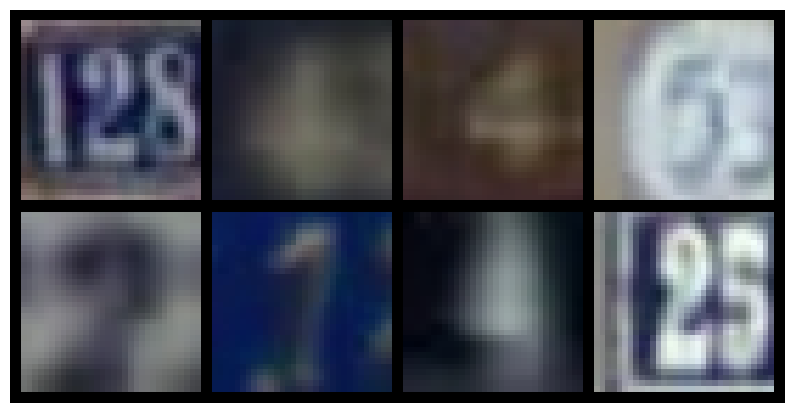

In [34]:
helper_utils.display_images(svhn_dataloader)

## Conclusion

As you've seen, TorchVision datasets are far more than just collections of images. They are organized, standardized, and designed to integrate with the entire PyTorch ecosystem, allowing you to focus on building great models rather than getting stuck on boilerplate code.

You now have the foundational skills to load a wide variety of data, from popular benchmarks like **CIFAR-10** and **SVHN**, to your own custom image collections. By mastering the use of `torchvision.datasets`, you have a solid and efficient foundation to build, test, and scale your computer vision models.